**TRAINING OF WRITING A BATTING ANALYSIS CODE**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [2]:
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')

In [3]:
matches.head(4)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN


In [4]:
deliveries.head(4)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [5]:
##note
##matches- when a player is a part of the playing 11
##innings- when a player gets to bat in the match
#batting average- runs/dismissal
#batting strike rate- (runs/ball)*100
#runs per innings- runs/innings
batsman='Surya Kumar Yadav'
matches=3
innings=2
runs_scored=[50,57] ##he was not out while playing 50
##50(30), 57(46)
runs=107
number_of_balls=76
dismissals=1
batting_avg=runs/dismissals
batting_sr=(runs/number_of_balls)*100
RPI=runs/innings ## runs per innings
print('batting average:', batting_avg)
print('batting strike rate:', batting_sr)
print('runs per innings:', RPI)

batting average: 107.0
batting strike rate: 140.78947368421052
runs per innings: 53.5


In [6]:
fours=9
sixes=5
bpb=number_of_balls/(fours+sixes) ##balls per boundaries
bpb

5.428571428571429

In [7]:
df=deliveries.copy()

In [8]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
f1= lambda x: x*x
f1(3)

9

In [10]:
df['isDot']=df['batsman_runs'].apply(lambda x: 1 if x==0 else 0)
df['isOne']=df['batsman_runs'].apply(lambda x: 1 if x==0 else 0)
df['isTwo']=df['batsman_runs'].apply(lambda x: 2 if x==0 else 0)
df['isThree']=df['batsman_runs'].apply(lambda x: 3 if x==0 else 0)
df.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,isDot,isOne,isTwo,isThree
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,1,2,3


In [11]:
df['isFour']=df['batsman_runs'].apply(lambda x: 4 if x==0 else 0)
df['isSix']=df['batsman_runs'].apply(lambda x: 6 if x==0 else 0)
df.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,isDot,isOne,isTwo,isThree,isFour,isSix
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,1,2,3,4,6


In [12]:
df.head(20)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,isDot,isOne,isTwo,isThree,isFour,isSix
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,1,2,3,4,6
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,1,2,3,4,6
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0,0,0,0,0,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,1,2,3,4,6
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,1,2,3,4,6
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,1,2,3,4,6
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,1,1,2,3,4,6
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,0,0,0
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0,0,0,0,0,0
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN,1,1,2,3,4,6


In [13]:
df['batsman'].unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

In [14]:
len(df['batsman'].unique())

516

In [15]:
df.groupby(['batsman'])['batsman_runs'].sum()

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Dananjaya          4
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2765
Z Khan             117
Name: batsman_runs, Length: 516, dtype: int64

In [16]:
df.groupby(['batsman','match_id'])['batsman_runs'].sum().head(10)

batsman         match_id
A Ashish Reddy  346         10
                352          3
                359          8
                373         10
                376          4
                384          7
                388         14
                394         16
                397          4
                402         19
Name: batsman_runs, dtype: int64

In [17]:
df[df.batsman == 'DA Warner' ].groupby(['batsman','match_id'])['batsman_runs'].sum()
##D Warner score in every match

batsman    match_id
DA Warner  1           14
           6           76
           10          49
           14          26
           19          70
                       ..
           11324       51
           11329       70
           11332       59
           11336       40
           11339       91
Name: batsman_runs, Length: 126, dtype: int64

In [18]:
df[df.batsman == 'S Dhawan' ].groupby(['batsman','match_id'])['batsman_runs'].sum().head(10)
##Shikhar Dhawan's score in every match
##3 things to remember- df, groupby columns, aggregate functions

batsman   match_id
S Dhawan  1           40
          6            9
          10          48
          14          23
          19          15
          21          70
          25          30
          32          77
          36          29
          39          28
Name: batsman_runs, dtype: int64

In [19]:
df.groupby(['match_id','batsman'])['batsman_runs'].sum()

match_id  batsman    
1         A Choudhary     6
          BCJ Cutting    16
          CH Gayle       32
          DA Warner      14
          DJ Hooda       16
                         ..
11415     RD Chahar       0
          RG Sharma      15
          SK Raina        9
          SN Thakur       2
          SR Watson      84
Name: batsman_runs, Length: 11294, dtype: int64

In [20]:
pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).sort_values(by='batsman_runs',ascending=False)

,batsman_runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
...,...
IC Pandey,0
J Denly,0
P Raj,0


In [21]:
df[df['batting_team']=='Sunrisers Hyderabad'].head(100)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,isDot,isOne,isTwo,isThree,isFour,isSix
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,1,2,3,4,6
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,1,2,3,4,6
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0,0,0,0,0,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,1,2,3,4,6
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,1,2,3,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,3,Yuvraj Singh,DJ Hooda,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,0,0,0
96,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,4,DJ Hooda,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,0,0,0
97,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,5,Yuvraj Singh,DJ Hooda,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,0,0,0
98,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,6,DJ Hooda,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,0,0,0


In [22]:
df[df['over']==1].tail(100)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,isDot,isOne,isTwo,isThree,isFour,isSix
177060,11343,2,Kolkata Knight Riders,Kings XI Punjab,1,5,CA Lynn,S Gill,Mohammed Shami,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,1,2,3,4,6
177061,11343,2,Kolkata Knight Riders,Kings XI Punjab,1,6,CA Lynn,S Gill,Mohammed Shami,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,1,2,3,4,6
177169,11344,1,Rajasthan Royals,Delhi Capitals,1,1,AM Rahane,L Livingstone,TA Boult,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,0,0,0
177170,11344,1,Rajasthan Royals,Delhi Capitals,1,2,L Livingstone,AM Rahane,TA Boult,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,0,0,0
177171,11344,1,Rajasthan Royals,Delhi Capitals,1,3,AM Rahane,L Livingstone,TA Boult,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178955,11415,2,Chennai Super Kings,Mumbai Indians,1,2,F du Plessis,SR Watson,MJ McClenaghan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,1,2,3,4,6
178956,11415,2,Chennai Super Kings,Mumbai Indians,1,3,F du Plessis,SR Watson,MJ McClenaghan,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0,0,0,0,0,0
178957,11415,2,Chennai Super Kings,Mumbai Indians,1,4,F du Plessis,SR Watson,MJ McClenaghan,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,0,0,0
178958,11415,2,Chennai Super Kings,Mumbai Indians,1,5,SR Watson,F du Plessis,MJ McClenaghan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,1,2,3,4,6


In [23]:
df[df['ball']==6].tail(100)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,isDot,isOne,isTwo,isThree,isFour,isSix
178472,11413,2,Delhi Capitals,Sunrisers Hyderabad,1,6,P Shaw,S Dhawan,B Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,1,2,3,4,6
178478,11413,2,Delhi Capitals,Sunrisers Hyderabad,2,6,S Dhawan,P Shaw,Mohammad Nabi,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,1,2,3,4,6
178484,11413,2,Delhi Capitals,Sunrisers Hyderabad,3,6,P Shaw,S Dhawan,K Ahmed,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,0,0,0
178490,11413,2,Delhi Capitals,Sunrisers Hyderabad,4,6,S Dhawan,P Shaw,Mohammad Nabi,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0,0,0,0,0,0
178496,11413,2,Delhi Capitals,Sunrisers Hyderabad,5,6,P Shaw,S Dhawan,B Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,1,2,3,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179053,11415,2,Chennai Super Kings,Mumbai Indians,16,6,SR Watson,DJ Bravo,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,0,0,0
179059,11415,2,Chennai Super Kings,Mumbai Indians,17,6,DJ Bravo,SR Watson,JJ Bumrah,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,0,0,0
179065,11415,2,Chennai Super Kings,Mumbai Indians,18,6,SR Watson,DJ Bravo,KH Pandya,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0,0,0,0,0
179071,11415,2,Chennai Super Kings,Mumbai Indians,19,6,RA Jadeja,SR Watson,JJ Bumrah,0,0,4,0,0,0,4,4,8,NaN,NaN,NaN,0,0,0,0,0,0


In [24]:
pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).head(3)

,batsman_runs
batsman,
A Ashish Reddy,280
A Chandila,4
A Chopra,53


In [25]:
df.index

RangeIndex(start=0, stop=179078, step=1)

In [26]:
pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).reset_index().head(3)

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53


In [27]:
pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).reset_index().rename(columns={'batsman_runs':'runs'}).head(3)

,batsman,runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53


In [28]:
runs=pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).reset_index().rename(columns={'batsman_runs':'runs'}).head(4)
runs.head(4)

,batsman,runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25


In [29]:
balls=pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).reset_index().rename(columns={'match_id':'balls'})
balls.head()

,batsman,balls
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Dananjaya,5


In [30]:
pd.DataFrame(df.groupby(['batsman'])['match_id'])

,0,1
0,A Ashish Reddy,81613 346 81614 346 81615 346 8161...
1,A Chandila,88164 373 96372 407 96374 407 96375 ...
2,A Chopra,20477 88 20478 88 20482 88 20484 ...
3,A Choudhary,246 1 247 1 7019 30 7020 30 70...
4,A Dananjaya,152403 7902 152404 7902 152405 7902 1...
...,...,...
511,YV Takawale,19103 82 19104 82 19105 82 1910...
512,Yashpal Singh,29241 126 29242 126 29243 126 29244 ...
513,Younis Khan,22677 97 22679 97 22680 97 22681 9...
514,Yuvraj Singh,66 1 67 1 69 ...


In [31]:
innings=pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x)))))
##number of matches played
innings.head()

,match_id
batsman,
A Ashish Reddy,23
A Chandila,2
A Chopra,6
A Choudhary,3
A Dananjaya,1


In [32]:
#number of dismissals of player
dismissals=pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns={'player_dismissed':'dismissals'})
dismissals.head()

,batsman,dismissals
0,A Ashish Reddy,15
1,A Chandila,1
2,A Chopra,5
3,A Choudhary,2
4,A Dananjaya,0


In [33]:
runs=pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).reset_index().rename(columns={'batsman_runs':'runs'})
balls=pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).reset_index().rename(columns={'match_id':'balls'})
innings=pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x)))))
dismissals=pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns={'player_dismissed':'dismissals'})
sixes=pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns={'isSix':'sixes'})
fours=pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns={'isFour':'fours'})

In [34]:
balls.head(1)

,batsman,balls
0,A Ashish Reddy,196


In [35]:
runs.head(1)

,batsman,runs
0,A Ashish Reddy,280


In [36]:
pd.merge(runs,balls,on='batsman').head()

,batsman,runs,balls
0,A Ashish Reddy,280,196
1,A Chandila,4,7
2,A Chopra,53,75
3,A Choudhary,25,20
4,A Dananjaya,4,5


In [37]:
pd.merge(innings,runs,on='batsman').merge(balls,on='batsman')

,batsman,match_id,runs,balls
0,A Ashish Reddy,23,280,196
1,A Chandila,2,4,7
2,A Chopra,6,53,75
3,A Choudhary,3,25,20
4,A Dananjaya,1,4,5
...,...,...,...,...
511,YV Takawale,10,192,183
512,Yashpal Singh,4,47,67
513,Younis Khan,1,3,7
514,Yuvraj Singh,126,2765,2207


In [38]:
mega=pd.merge(innings,runs,on='batsman').merge(balls,on='batsman').merge(dismissals,on='batsman').merge(fours,on='batsman').merge(sixes,on='batsman').rename(columns={'match_id':'innings'})

In [39]:
mega.head()

,batsman,innings,runs,balls,dismissals,fours,sixes
0,A Ashish Reddy,23,280,196,15,244,366
1,A Chandila,2,4,7,1,12,18
2,A Chopra,6,53,75,5,180,270
3,A Choudhary,3,25,20,2,16,24
4,A Dananjaya,1,4,5,0,8,12


In [40]:
mega['RPI']=mega.apply(lambda x: (x['runs']/x['innings']), axis=1)
mega.head()

,batsman,innings,runs,balls,dismissals,fours,sixes,RPI
0,A Ashish Reddy,23,280,196,15,244,366,12.173913
1,A Chandila,2,4,7,1,12,18,2.000000
2,A Chopra,6,53,75,5,180,270,8.833333
3,A Choudhary,3,25,20,2,16,24,8.333333
4,A Dananjaya,1,4,5,0,8,12,4.000000


In [41]:
def ByInnings(df,current_innings):
  df=df[df.inning == current_innings]
  df.reset_index(inplace=True, drop=True)

  df['isDot']=df['batsman_runs'].apply(lambda x: 1 if x==0 else 0)
  df['isOne']=df['batsman_runs'].apply(lambda x: 1 if x==0 else 0)
  df['isTwo']=df['batsman_runs'].apply(lambda x: 2 if x==0 else 0)
  df['isThree']=df['batsman_runs'].apply(lambda x: 3 if x==0 else 0)
  df['isFour']=df['batsman_runs'].apply(lambda x: 4 if x==0 else 0)
  df['isSix']=df['batsman_runs'].apply(lambda x: 6 if x==0 else 0)

  runs=pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).reset_index().rename(columns={'batsman_runs':'runs'})
  balls=pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).reset_index().rename(columns={'match_id':'balls'})
  innings=pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x)))))
  dismissals=pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns={'player_dismissed':'dismissals'})
  sixes=pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns={'isSix':'sixes'})
  fours=pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns={'isFour':'fours'})

  df=pd.merge(innings,runs,on='batsman').merge(balls,on='batsman').merge(dismissals,on='batsman').merge(fours,on='batsman').merge(sixes,on='batsman').rename(columns={'match_id':'innings'})
  df['RPI']=df.apply(lambda x: (x['runs']/x['innings']), axis=1)

  return df

In [42]:
ing1_df=ByInnings(df,1)
ing2_df=ByInnings(df,2)

In [43]:
ing1_df.head()

,batsman,innings,runs,balls,dismissals,fours,sixes,RPI
0,A Ashish Reddy,13,166,115,7,128,192,12.769231
1,A Chandila,2,4,7,1,12,18,2.000000
2,A Chopra,5,51,72,4,176,264,10.200000
3,A Choudhary,1,15,12,0,4,6,15.000000
4,A Dananjaya,1,4,5,0,8,12,4.000000


In [44]:
ing2_df.head()

,batsman,innings,runs,balls,dismissals,fours,sixes,RPI
0,A Ashish Reddy,10,114,81,8,116,174,11.4
1,A Chopra,1,2,3,1,4,6,2.0
2,A Choudhary,2,10,8,2,12,18,5.0
3,A Flintoff,2,40,43,2,84,126,20.0
4,A Hales,3,99,66,3,104,156,33.0


In [45]:
def balls_per_dismissal(balls,dismissals):
  if dismissals>0:
    return balls/dismissals
  else:
    return balls/1
def balls_per_boundary(balls,boundaries):
  if boundaries>0:
    return balls/boundaries
  else:
    return balls/1

def playerStatistics(df):
  df['isDot']=df['batsman_runs'].apply(lambda x: 1 if x==0 else 0)
  df['isOne']=df['batsman_runs'].apply(lambda x: 1 if x==0 else 0)
  df['isTwo']=df['batsman_runs'].apply(lambda x: 2 if x==0 else 0)
  df['isThree']=df['batsman_runs'].apply(lambda x: 3 if x==0 else 0)
  df['isFour']=df['batsman_runs'].apply(lambda x: 4 if x==0 else 0)
  df['isSix']=df['batsman_runs'].apply(lambda x: 6 if x==0 else 0)

  runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum().reset_index()).groupby(['batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'runs'})
  innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
  balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
  dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

  dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
  ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
  twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
  threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
  fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
  sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

  df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
  df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1) ##strike rate
  df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1) ## runs per innings
  df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1) ## boundaries per innings
  df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1) ##balls per boundary

  return df


In [46]:
df=playerStatistics(deliveries)

In [47]:
df.head()

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,23,280,196,15,61,61,122,183,244,366,142.857143,12.173913,13.066667,0.321311
1,A Chandila,2,4,7,1,3,3,6,9,12,18,57.142857,2.000000,7.000000,0.233333
2,A Chopra,6,53,75,5,45,45,90,135,180,270,70.666667,8.833333,15.000000,0.166667
3,A Choudhary,3,25,20,2,4,4,8,12,16,24,125.000000,8.333333,10.000000,0.500000
4,A Dananjaya,1,4,5,0,2,2,4,6,8,12,80.000000,4.000000,5.000000,0.250000


**PERFORMANCE IN DIFFERENT PHASES OF PLAY**

In [48]:
def phase(over):
  if over<=6:
    return 'Powerplay'
  elif over <=15:
    return 'Middle'
  else:
    return 'Death'

In [49]:
deliveries['phase']=deliveries['over'].apply(lambda x: phase(x))

In [50]:
def phasesOfplay(df,current_phase):
  df=df[df.phase==current_phase]
  df.reset_index(inplace=True,drop=True)

  df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
  df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
  df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
  df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
  df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
  df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

  runs = pd.DataFrame(df.groupby(['batsman', 'match_id'])['batsman_runs'].sum().reset_index()).groupby(['batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'runs'})
  innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
  balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
  dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

  dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
  ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
  twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
  threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
  fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
  sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

  df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
  df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)
  df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)
  df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)
  df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)

  return df

In [51]:
pp_df=phasesOfplay(deliveries,'Powerplay')
mid_df=phasesOfplay(deliveries,'Middle')
dth_df=phasesOfplay(deliveries,'Death')

In [52]:
pp_df.head()

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,1,5,7,1,5,1,0,0,1,0,71.428571,5.000000,7.000000,7.000000
1,A Chopra,5,27,41,2,26,11,0,0,4,0,65.853659,5.400000,20.500000,10.250000
2,A Flintoff,1,14,15,0,11,1,0,1,1,1,93.333333,14.000000,15.000000,7.500000
3,A Hales,6,118,82,3,34,24,7,0,11,6,143.902439,19.666667,27.333333,4.823529
4,A Mishra,1,1,5,0,4,1,0,0,0,0,20.000000,1.000000,5.000000,5.000000


In [53]:
mid_df.head()

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,5,61,41,0,16,13,5,0,2,5,148.780488,12.200000,41.000000,5.857143
1,A Chopra,3,25,32,2,18,9,2,0,3,0,78.125000,8.333333,16.000000,10.666667
2,A Flintoff,2,23,24,1,8,13,1,0,2,0,95.833333,11.500000,24.000000,12.000000
3,A Hales,3,34,37,3,12,20,3,0,2,0,91.891892,11.333333,12.333333,18.500000
4,A Kumble,1,1,5,0,4,1,0,0,0,0,20.000000,1.000000,5.000000,5.000000


In [54]:
dth_df.head()

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,22,214,148,14,40,69,15,1,13,10,144.594595,9.727273,10.571429,6.434783
1,A Chandila,2,4,7,1,3,4,0,0,0,0,57.142857,2.000000,7.000000,7.000000
2,A Chopra,1,1,2,1,1,1,0,0,0,0,50.000000,1.000000,2.000000,2.000000
3,A Choudhary,3,25,20,2,4,13,1,0,1,1,125.000000,8.333333,10.000000,10.000000
4,A Dananjaya,1,4,5,0,2,2,1,0,0,0,80.000000,4.000000,5.000000,5.000000


**PERFORMANCE WHILE BATTING 1ST AND BATTING 2ND**

In [55]:
def ByInning(df, current_inning):

    df = df[df.inning == current_inning]
    df.reset_index(inplace = True, drop = True)

    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['batsman', 'match_id'])['batsman_runs'].sum().reset_index()).groupby(['batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'runs'})
    innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

    dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

    df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)
    df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
    return df

In [56]:
ing1_df=ByInnings(deliveries,1)
ing2_df=ByInnings(deliveries,2)

In [57]:
ing1_df.head()

,batsman,innings,runs,balls,dismissals,fours,sixes,RPI
0,A Ashish Reddy,13,166,115,7,128,192,12.769231
1,A Chandila,2,4,7,1,12,18,2.000000
2,A Chopra,5,51,72,4,176,264,10.200000
3,A Choudhary,1,15,12,0,4,6,15.000000
4,A Dananjaya,1,4,5,0,8,12,4.000000


In [58]:
ing2_df.head()

,batsman,innings,runs,balls,dismissals,fours,sixes,RPI
0,A Ashish Reddy,10,114,81,8,116,174,11.4
1,A Chopra,1,2,3,1,4,6,2.0
2,A Choudhary,2,10,8,2,12,18,5.0
3,A Flintoff,2,40,43,2,84,126,20.0
4,A Hales,3,99,66,3,104,156,33.0


In [59]:
comp=ing1_df[['batsman','RPI']].merge(ing2_df[['batsman','RPI']],on='batsman',how='inner').rename(columns={'RPI_x':'1st_RPI', 'RPI_y':'2nd_RPI'})

In [60]:
comp.head()

,batsman,1st_RPI,2nd_RPI
0,A Ashish Reddy,12.769231,11.4
1,A Chopra,10.200000,2.0
2,A Choudhary,15.000000,5.0
3,A Flintoff,22.000000,20.0
4,A Hales,17.666667,33.0


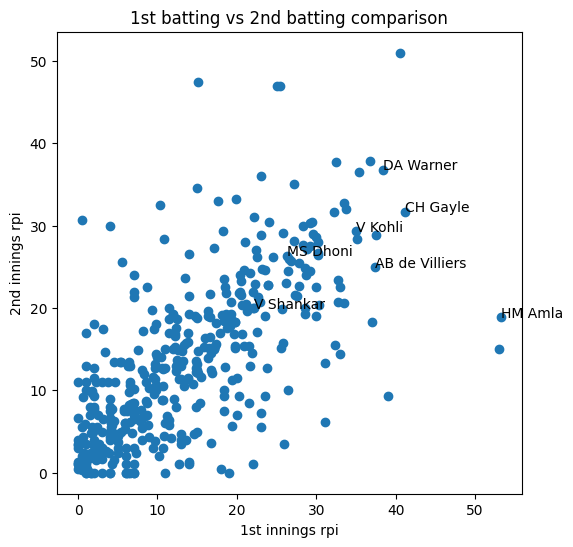

In [61]:
from __future__ import annotations
plt.figure(figsize=(6,6))
plt.scatter(comp['1st_RPI'],comp['2nd_RPI'])
plt.xlabel('1st innings rpi')
plt.ylabel('2nd innings rpi')
plt.title('1st batting vs 2nd batting comparison')
annotations=list(comp['batsman'])
selected_players = ['CH Gayle', 'V Kohli', 'AB de Villiers', 'DA Warner', 'V Shankar', 'HM Amla', 'MS Dhoni']
for i,label in enumerate(annotations):
  if label in selected_players:
    plt.annotate(label,(comp['1st_RPI'][i],comp['2nd_RPI'][i]))
plt.show()

**PERFORMANCE AGANIST ALL OPPOSITION**

In [62]:
def ByOpposition(df,current_opposition):
  df[df.bowling_team == current_opposition]
  df.reset_index(inplace=True,drop=True)

  df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
  df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
  df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
  df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
  df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
  df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

  runs = pd.DataFrame(df.groupby(['batsman', 'match_id'])['batsman_runs'].sum().reset_index()).groupby(['batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'runs'})
  innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
  balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
  dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

  dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
  ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
  twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
  threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
  fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
  sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

  df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
  df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)
  df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)
  df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)
  df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
  return df

In [63]:
ByOpposition(deliveries,'Royal Challengers Bangalore').head()

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,23,280,196,15,61,83,20,1,16,15,142.857143,12.173913,13.066667,6.322581
1,A Chandila,2,4,7,1,3,4,0,0,0,0,57.142857,2.000000,7.000000,7.000000
2,A Chopra,6,53,75,5,45,21,2,0,7,0,70.666667,8.833333,15.000000,10.714286
3,A Choudhary,3,25,20,2,4,13,1,0,1,1,125.000000,8.333333,10.000000,10.000000
4,A Dananjaya,1,4,5,0,2,2,1,0,0,0,80.000000,4.000000,5.000000,5.000000


In [64]:
deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,isDot,isOne,isTwo,isThree,isFour,isSix,phase
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay


**Virat Kohli's Performance**

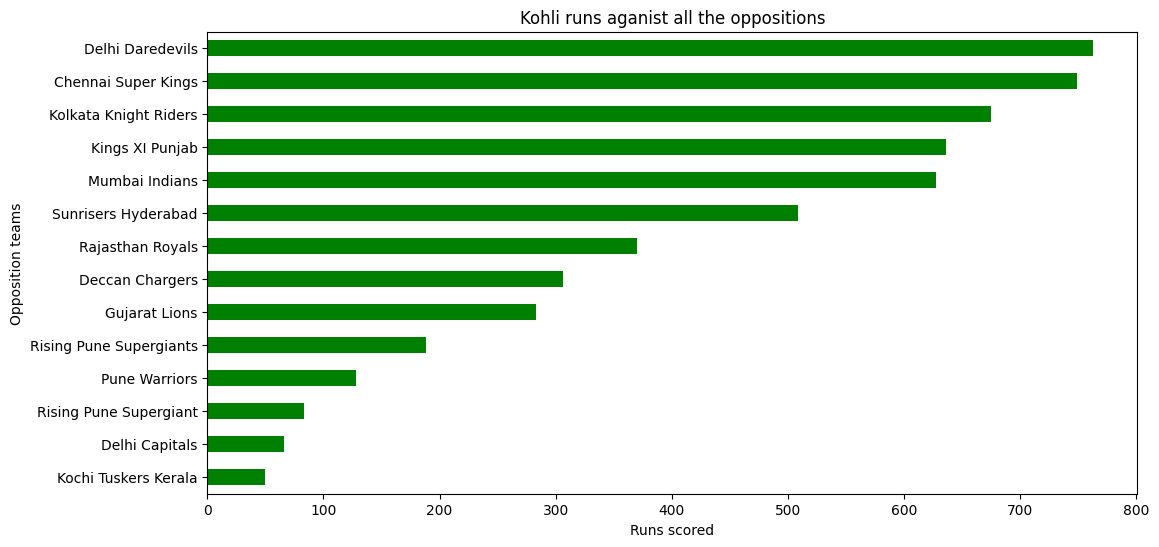

In [65]:
selected_player='V Kohli'
plt.figure(figsize=(12,6))
deliveries[deliveries.batsman == selected_player].groupby(['bowling_team'])['batsman_runs'].sum().sort_values().plot(kind='barh',color='g')
plt.title('Kohli runs aganist all the oppositions')
plt.xlabel('Runs scored')
plt.ylabel('Opposition teams')
plt.show()

**VENUE ANALYSIS**

In [66]:
matches=pd.read_csv('matches.csv')

In [67]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [68]:
def wintoss_winmatch(toss_decision,team1,team2,winner):
  if toss_decision == 'field':
    if team2 == winner:
      return True
    else:
      return False
  else:
    if team1 == winner:
      return True
    else:
      return False

In [69]:
matches['wintoss_winmatch']=matches.apply(lambda x: wintoss_winmatch(x['toss_decision'],x['team1'],x['team2'],x['winner']),axis=1)

In [70]:
matches[['id','season','team1','team2','wintoss_winmatch']].head()

,id,season,team1,team2,wintoss_winmatch
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,False
1,2,2017,Mumbai Indians,Rising Pune Supergiant,True
2,3,2017,Gujarat Lions,Kolkata Knight Riders,True
3,4,2017,Rising Pune Supergiant,Kings XI Punjab,True
4,5,2017,Royal Challengers Bangalore,Delhi Daredevils,True


In [71]:
print('percentage of wintoss winmatch:',100* len(matches[matches.wintoss_winmatch==1])/len(matches))

percentage of wintoss winmatch: 51.98412698412698


In [72]:
def isOut(player_dismissed):
  try:
    x=math.isnan(player_dismissed)
    return 0
  except:
    return 1
def venueAnalysis(mdf, df):
  runs = pd.DataFrame(df.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index())
  runs['Id_Ing'] = runs.apply(lambda x: str(x['match_id']) + '-' + str(x['inning']), axis = 1)
  balls = pd.DataFrame(df.groupby(['match_id', 'inning'])['total_runs'].count().reset_index()).rename(columns = {'total_runs':'total_balls'})
  balls['Id_Ing'] = balls.apply(lambda x: str(x['match_id']) + '-' + str(x['inning']), axis = 1)
  df['isOut'] = df['player_dismissed'].apply(lambda x: isOut(x))
  outs = pd.DataFrame(df.groupby(['match_id', 'inning'])['isOut'].sum().reset_index()).rename(columns = {'isOut':'wickets'})
  outs['Id_Ing'] = outs.apply(lambda x: str(x['match_id']) + '-' + str(x['inning']), axis = 1)
  df = pd.merge(runs, balls[['Id_Ing', 'total_balls']], on = 'Id_Ing').merge(outs[['Id_Ing', 'wickets']], on = 'Id_Ing')
  mdf = mdf.rename(columns = {'id':'match_id'})
  df = pd.merge(df, mdf[['match_id', 'venue']], on = 'match_id')
  df = df[['match_id', 'venue', 'inning', 'total_runs', 'total_balls', 'wickets']]
  return df

In [73]:
ven_df=venueAnalysis(matches,deliveries)
ven_df.head()

,match_id,venue,inning,total_runs,total_balls,wickets
0,1,"Rajiv Gandhi International Stadium, Uppal",1,207,125,4
1,1,"Rajiv Gandhi International Stadium, Uppal",2,172,123,10
2,2,Maharashtra Cricket Association Stadium,1,184,125,8
3,2,Maharashtra Cricket Association Stadium,2,187,122,3
4,3,Saurashtra Cricket Association Stadium,1,183,122,4


In [74]:
pd.DataFrame(ven_df.groupby('venue')['total_runs'].mean().sort_values(ascending=False)).rename(columns={'total_runs':'Avg_Runs'}).reset_index().head(10)

,venue,Avg_Runs
0,IS Bindra Stadium,177.357143
1,Brabourne Stadium,174.636364
2,M. Chinnaswamy Stadium,167.357143
3,"Punjab Cricket Association IS Bindra Stadium, ...",167.178571
4,ACA-VDCA Stadium,164.500000
5,Rajiv Gandhi Intl. Cricket Stadium,163.812500
6,Maharashtra Cricket Association Stadium,163.595238
7,Barabati Stadium,162.714286
8,Green Park,162.250000
9,Holkar Cricket Stadium,162.222222


In [75]:
def ByVenue(df, current_venue):
  df=df[df.venue == current_venue]
  df.reset_index(inplace=True,drop=True)

  df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
  df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
  df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
  df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
  df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
  df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

  runs = pd.DataFrame(df.groupby(['batsman', 'match_id'])['batsman_runs'].sum().reset_index()).groupby(['batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'runs'})
  innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
  balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
  dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

  dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
  ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
  twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
  threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
  fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
  sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

  df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
  df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)
  df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)
  df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)
  df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
  return df

In [76]:
matches.rename(columns={'id':'match_id'},inplace=True)

In [77]:
matches.head()

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,wintoss_winmatch
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,False
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,True
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,True
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,True
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,True


In [78]:
combined_data=deliveries.merge(matches[['match_id','venue']],on='match_id',how='left')
combined_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,isDot,isOne,isTwo,isThree,isFour,isSix,phase,isOut,venue
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay,0,"Rajiv Gandhi International Stadium, Uppal"
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay,0,"Rajiv Gandhi International Stadium, Uppal"
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0,0,0,0,1,0,Powerplay,0,"Rajiv Gandhi International Stadium, Uppal"
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay,0,"Rajiv Gandhi International Stadium, Uppal"
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay,0,"Rajiv Gandhi International Stadium, Uppal"


In [79]:
current_venue='Wankhede Stadium'
df= ByVenue(combined_data, current_venue)
df.head()

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,1,10,10,1,6,2,1,0,0,1,100.000000,10.0,10.0,10.0
1,A Chopra,1,1,4,0,3,1,0,0,0,0,25.000000,1.0,4.0,4.0
2,A Dananjaya,1,4,5,0,2,2,1,0,0,0,80.000000,4.0,5.0,5.0
3,A Joseph,1,15,13,0,6,3,2,0,2,0,115.384615,15.0,13.0,6.5
4,A Mishra,3,21,18,2,9,5,0,0,4,0,116.666667,7.0,9.0,4.5


In [80]:
def ByCustom(df,current_venue,current_phase,current_opposition):
  df=df[df.venue == current_venue]
  df=df[df.phase == current_phase]
  df=df[df.bowling_team == current_opposition]
  df.reset_index(inplace=True,drop=True)

  df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
  df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
  df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
  df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
  df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
  df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

  runs = pd.DataFrame(df.groupby(['batsman', 'match_id'])['batsman_runs'].sum().reset_index()).groupby(['batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'runs'})
  innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
  balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
  dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

  dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
  ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
  twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
  threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
  fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
  sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

  df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
  df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)
  df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)
  df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)
  df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
  return df

In [81]:
df= ByCustom(combined_data, 'Wankhede Stadium','Middle','Mumbai Indians')

In [82]:
df['dot_percentage']=df.apply(lambda x: x['dots']/x['balls'], axis=1)

In [83]:
df.head()

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,dot_percentage
0,A Ashish Reddy,1,10,8,0,4,2,1,0,0,1,125.000000,10.000000,8.0,8.000000,0.500000
1,AB Agarkar,1,15,14,1,6,5,1,0,2,0,107.142857,15.000000,14.0,7.000000,0.428571
2,AB Dinda,1,1,1,0,0,1,0,0,0,0,100.000000,1.000000,1.0,1.000000,0.000000
3,AB de Villiers,6,175,108,4,28,49,5,0,20,6,162.037037,29.166667,27.0,4.153846,0.259259
4,AD Mathews,2,24,25,1,8,14,2,0,0,1,96.000000,12.000000,25.0,25.000000,0.320000


**TOPSIS METHOD**

In [84]:
wt_sr,wt_rpi,wt_bpd,wt_dot_percentage=0.13, 0.27, 0.16, 0.45

In [85]:
df=df[df.innings>=2]

In [86]:
##doing square of all values
df['calc_SR']=df['SR'].apply(lambda x: x*x)
df['calc_RPI']=df['RPI'].apply(lambda x: x*x)
df['calc_BPD']=df['BPD'].apply(lambda x: x*x)
df['calc_dot_percentage']=df['dot_percentage'].apply(lambda x: x*x)

sq_sr,sq_rpi,sq_bpd,sq_dot_percentage=np.sqrt(df[['calc_SR','calc_RPI','calc_BPD','calc_dot_percentage']].sum(axis=0))

df['calc_SR']=df['calc_SR'].apply(lambda x: x/ sq_sr)
df['calc_RPI']=df['calc_RPI'].apply(lambda x: x/sq_rpi)
df['calc_BPD']=df['calc_BPD'].apply(lambda x: x/sq_bpd)
df['calc_dot_percentage']=df['calc_dot_percentage'].apply(lambda x: x/sq_dot_percentage)

df['calc_SR']=df['calc_SR'].apply(lambda x: x*wt_sr)
df['calc_RPI']=df['calc_RPI'].apply(lambda x: x*wt_rpi)
df['calc_BPD']=df['calc_BPD'].apply(lambda x: x*wt_bpd)
df['calc_dot_percentage']=df['calc_dot_percentage'].apply(lambda x: x*wt_dot_percentage)

best_sr,worst_sr=max(df['calc_SR']),min(df['calc_SR'])
best_rpi,worst_rpi=max(df['calc_RPI']),min(df['calc_RPI'])
best_bpd,worst_bpd=max(df['calc_BPD']),min(df['calc_BPD'])
best_dot_percentage,worst_dot_percentage=max(df['calc_dot_percentage']),min(df['calc_dot_percentage'])

In [88]:
df['dev_best_SR'] = df['calc_SR'].apply(lambda x: (x-best_sr)*(x-best_sr))
df['dev_best_RPI'] = df['calc_RPI'].apply(lambda x: (x-best_rpi)*(x-best_rpi))
df['dev_best_BPD'] = df['calc_BPD'].apply(lambda x: (x-best_bpd)*(x-best_bpd))
df['dev_best_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: (x-best_dot_percentage)*(x-best_dot_percentage))
df['dev_best_sqrt'] = df.apply(lambda x: x['dev_best_SR'] + x['dev_best_RPI'] + x['dev_best_BPD'] + x['dev_best_dot_percentage'], axis = 1)

df['dev_worst_SR'] = df['calc_SR'].apply(lambda x: (x-worst_sr)*(x-worst_sr))
df['dev_worst_RPI'] = df['calc_RPI'].apply(lambda x: (x-worst_rpi)*(x-worst_rpi))
df['dev_worst_BPD'] = df['calc_BPD'].apply(lambda x: (x-worst_bpd)*(x-worst_bpd))
df['dev_worst_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: (x-worst_dot_percentage)*(x-worst_dot_percentage))
df['dev_worst_sqrt'] = df.apply(lambda x: x['dev_worst_SR'] + x['dev_worst_RPI'] + x['dev_worst_BPD'] + x['dev_worst_dot_percentage'], axis = 1)

In [90]:
df['score']=df.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt']+x['dev_best_sqrt']),axis=1)

In [91]:
df[['batsman','score']].head(20)

,batsman,score
3,AB de Villiers,0.168063
4,AD Mathews,0.008415
6,AD Russell,0.000180
7,AJ Finch,0.060708
9,AM Nayar,0.013864
10,AM Rahane,0.041566
14,B Chipli,0.001382
17,BB McCullum,0.099849
23,CA Lynn,0.000013
24,CH Gayle,0.062426


**TOP PLAYERS WE ARE LOOKING FOR OUR REQUIRED ROLE**

In [92]:
df[['batsman','innings','runs','balls','dismissals','dot_percentage','score']].sort_values(['score'],ascending=False).reset_index(drop=True).head(20)

,batsman,innings,runs,balls,dismissals,dot_percentage,score
0,JC Buttler,2,131,59,1,0.186441,0.947253
1,RR Pant,2,62,32,1,0.281250,0.337929
2,SV Samson,4,118,82,0,0.219512,0.323070
3,KL Rahul,3,97,86,1,0.267442,0.299868
4,GJ Maxwell,4,104,54,4,0.333333,0.278504
5,DA Warner,2,59,32,2,0.343750,0.261042
6,MK Tiwary,3,91,75,1,0.400000,0.219002
7,KK Nair,2,50,29,2,0.379310,0.181050
8,KM Jadhav,5,89,78,1,0.320513,0.173417
9,AB de Villiers,6,175,108,4,0.259259,0.168063
